# 3. Train

**Tensorboard**
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

In [1]:
import time
import os
import pandas as pd

project_name = 'Dog_Breed_Identification'
step_name = 'Train'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
model_path = os.path.join(cwd, 'model')
print('model_path: ' + model_path)
log_path = os.path.join(cwd, 'log')
print('model_path: ' + log_path)

run_name: Dog_Breed_Identification_Train_20171028_220321
model_path: E:\Udacity\MachineLearning(Advanced)\p6_graduation_project\model
model_path: E:\Udacity\MachineLearning(Advanced)\p6_graduation_project\log


In [2]:
df = pd.read_csv(os.path.join(cwd, 'input', 'labels.csv'))
print('lables amount: %d' %len(df))
df.head()

lables amount: 10222


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

x_train = []
y_train = {}
x_val = []
y_val = {}
x_test = []

cwd = os.getcwd()
feature_cgg16 = os.path.join(cwd, 'model', 'feature_VGG16_{}.h5'.format(20171026))
feature_cgg19 = os.path.join(cwd, 'model', 'feature_VGG19_{}.h5'.format(20171026))
feature_resnet50 = os.path.join(cwd, 'model', 'feature_ResNet50_{}.h5'.format(20171026))
feature_xception = os.path.join(cwd, 'model', 'feature_Xception_{}.h5'.format(20171026))
feature_inception = os.path.join(cwd, 'model', 'feature_InceptionV3_{}.h5'.format(20171026))
# feature_inceptionResNetV2 = os.path.join(cwd, 'model', 'feature_InceptionResNetV2_{}.h5'.format(20171028))
for filename in [feature_cgg16, feature_cgg19, feature_resnet50, feature_xception, feature_inception]:
    with h5py.File(filename, 'r') as h:
        x_train.append(np.array(h['train']))
        y_train = np.array(h['train_labels'])
        x_test.append(np.array(h['test']))

# print(x_train[0].shape)
x_train = np.concatenate(x_train, axis=-1)
# y_train = np.concatenate(y_train, axis=0)
# x_val = np.concatenate(x_val, axis=-1)
# y_val = np.concatenate(y_val, axis=0)
x_test = np.concatenate(x_test, axis=-1)
print(x_train.shape)
print(x_train.shape[1:])

print(len(y_train))
# print(x_val.shape)
# print(len(y_val))
print(x_test.shape)

(10222, 7168)
(7168,)
10222
(10357, 7168)


In [4]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
print(y_train.shape)
# print(y_val.shape)

Using TensorFlow backend.


(10222, 120)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=2017)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(9710, 7168)
(9710, 120)
(512, 7168)
(512, 120)


In [6]:
print(x_train.shape[1])

7168


### Build NN

In [7]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

In [8]:
log_dir = os.path.join(log_path, run_name)
print('log_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

log_dir:E:\Udacity\MachineLearning(Advanced)\p6_graduation_project\log\Dog_Breed_Identification_Train_20171028_220321


In [9]:
model = Sequential()
model.add(Dense(8192, input_shape=x_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(8192, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train,
                 batch_size=128,
                 epochs=40, #Increase this when not on Kaggle kernel
                 verbose=1,  #1 for ETA, 0 for silent
                 validation_data=(x_val, y_val), 
                 callbacks=[tensorBoard])

Train on 9710 samples, validate on 512 samples
Epoch 1/40
9710/9710 [==============================] - 10s - loss: 4.8974 - acc: 0.0117 - val_loss: 4.6823 - val_acc: 0.0430
Epoch 2/40
9710/9710 [==============================] - 9s - loss: 4.5741 - acc: 0.0407 - val_loss: 4.1562 - val_acc: 0.1445
Epoch 3/40
9710/9710 [==============================] - 9s - loss: 4.0831 - acc: 0.1038 - val_loss: 3.5850 - val_acc: 0.2852
Epoch 4/40
9710/9710 [==============================] - 9s - loss: 3.6090 - acc: 0.1872 - val_loss: 3.0853 - val_acc: 0.3770
Epoch 5/40
9710/9710 [==============================] - 9s - loss: 3.1512 - acc: 0.2742 - val_loss: 2.6368 - val_acc: 0.5059
Epoch 6/40
9710/9710 [==============================] - 9s - loss: 2.7515 - acc: 0.3605 - val_loss: 2.2516 - val_acc: 0.5840
Epoch 7/40
9710/9710 [==============================] - 9s - loss: 2.3936 - acc: 0.4510 - val_loss: 1.9100 - val_acc: 0.6406
Epoch 8/40
9710/9710 [==============================] - 9s - loss: 2.0950 - a

In [11]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

352/512 [===================>..........] - ETA: 0sFinal loss: 0.4779, final accuracy: 0.8516


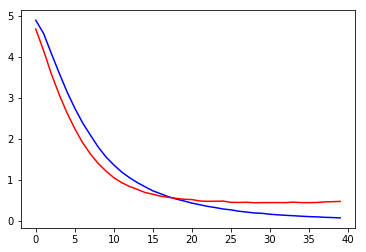

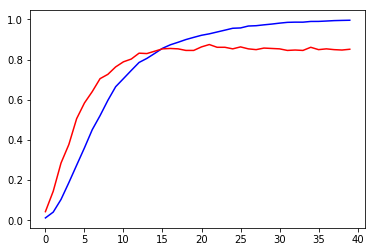

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [13]:
run_name0 = run_name + '_' + str(int(final_acc*1000)).zfill(4)
print(run_name0)

Dog_Breed_Identification_Train_20171028_220321_0851


In [14]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name0)

In [15]:
print('Done !')

Done !
